- Particionar datos en train, dev-train, dev y test (teniendo en cuenta que en train debe haber igual número de 1 que de 0)
- Modelos
    - Si las cosas van mal, hacer varios modelos, ver el error por variables e identificar si cada modelo acierta/falla en cosas distintas. Si es así, se podría hacer ensembling.

Vamos a intentarlo con scikit

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('./train_data_all_changes_made_balanced1.csv')

In [4]:
data1.columns

Index(['click_time_wday', 'is_attributed', 'click_time_hour',
       'n_previous_clicks', 'click_time_diff', 'device_cat',
       'device_custom_score', 'os_cat', 'os_custom_score', 'app_cat',
       'app_custom_score', 'channel_cat', 'channel_custom_score'],
      dtype='object')

In [137]:
data1.describe(include='all')

,click_time_wday,is_attributed,click_time_hour,n_previous_clicks,click_time_diff,device_cat,device_custom_score,os_cat,os_custom_score,app_cat,app_custom_score,channel_cat,channel_custom_score
count,1933046,1.933046e+06,1.933046e+06,1.933046e+06,1.933046e+06,1933046,1.933046e+06,1933046,1.933046e+06,1933046,1.933046e+06,1933046,1.933046e+06
unique,4,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,Wed,NaN,NaN,NaN,NaN,J,NaN,F,NaN,F,NaN,F,NaN
freq,655882,NaN,NaN,NaN,NaN,1864825,NaN,1435737,NaN,1490438,NaN,1827378,NaN
mean,NaN,2.363348e-01,9.140116e+00,3.135831e+02,1.094391e+03,NaN,1.043492e+03,NaN,3.900694e+02,NaN,3.070854e+03,NaN,2.253801e+03
std,NaN,4.248303e-01,6.112920e+00,1.036181e+03,1.176368e+03,NaN,2.201043e+03,NaN,1.203713e+03,NaN,9.249007e+03,NaN,6.135403e+03
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00
25%,NaN,0.000000e+00,4.000000e+00,9.000000e+00,5.367083e+01,NaN,5.388582e+02,NaN,6.496665e+00,NaN,6.258023e-01,NaN,1.123132e-01
50%,NaN,0.000000e+00,9.000000e+00,7.600000e+01,6.569000e+02,NaN,5.388582e+02,NaN,9.545005e+01,NaN,3.104765e+00,NaN,8.713982e-01
75%,NaN,0.000000e+00,1.300000e+01,2.940000e+02,1.870529e+03,NaN,5.388582e+02,NaN,1.436595e+02,NaN,2.152750e+01,NaN,6.212254e+00


In [3]:
data1 = data1[['device_custom_score', 'os_custom_score', 'app_custom_score', 'channel_custom_score', 'click_time_hour', 'click_time_wday', 'is_attributed']]

data1['click_time_hour'] = data1['click_time_hour'].astype('category')

In [10]:
data1.describe(include='all')

,device_custom_score,os_custom_score,app_custom_score,channel_custom_score,n_previous_clicks,click_time_hour,click_time_wday,is_attributed
count,1.933046e+06,1.933046e+06,1.933046e+06,1.933046e+06,1.933046e+06,1.933046e+06,1933046,1.933046e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Wed,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,655882,NaN
mean,1.043492e+03,3.900694e+02,3.070854e+03,2.253801e+03,3.135831e+02,9.140116e+00,NaN,2.363348e-01
std,2.201043e+03,1.203713e+03,9.249007e+03,6.135403e+03,1.036181e+03,6.112920e+00,NaN,4.248303e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,5.388582e+02,6.496665e+00,6.258023e-01,1.123132e-01,9.000000e+00,4.000000e+00,NaN,0.000000e+00
50%,5.388582e+02,9.545005e+01,3.104765e+00,8.713982e-01,7.600000e+01,9.000000e+00,NaN,0.000000e+00
75%,5.388582e+02,1.436595e+02,2.152750e+01,6.212254e+00,2.940000e+02,1.300000e+01,NaN,0.000000e+00


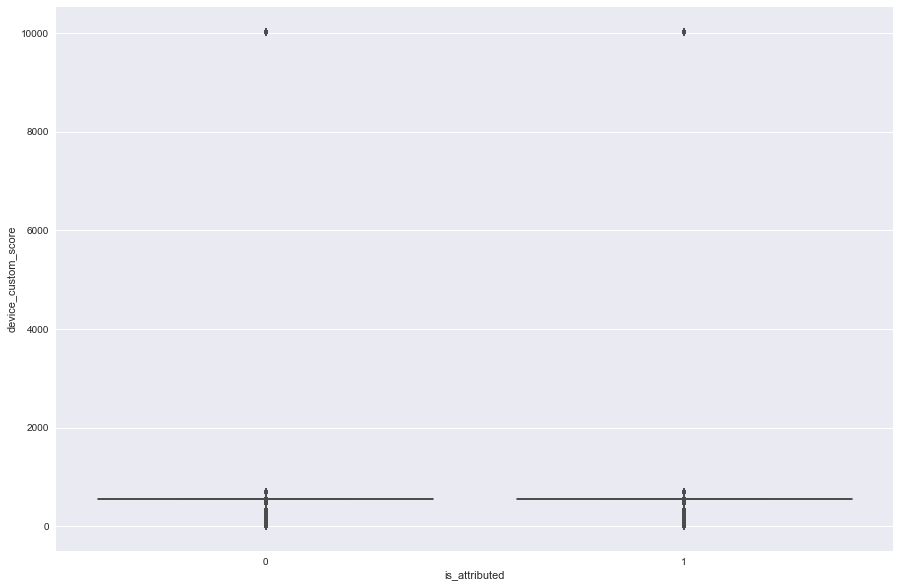

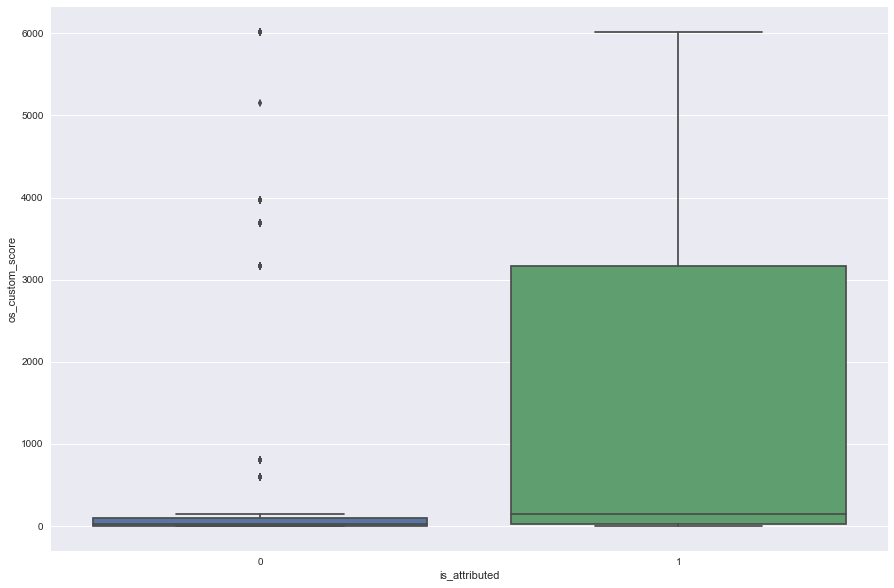

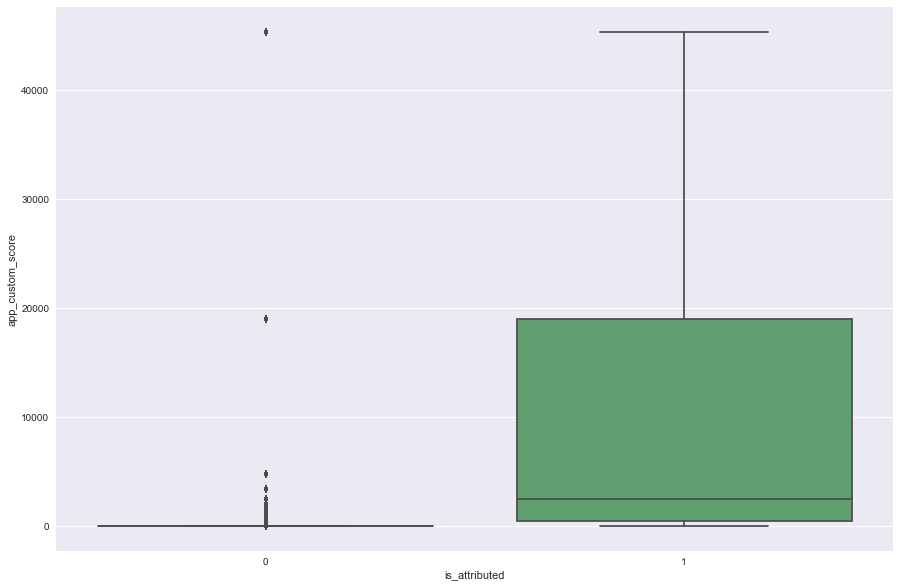

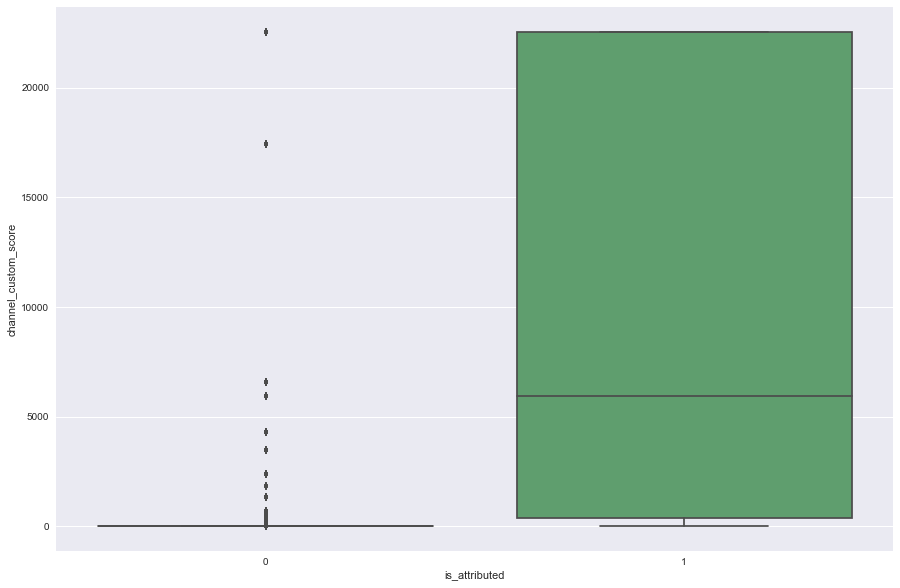

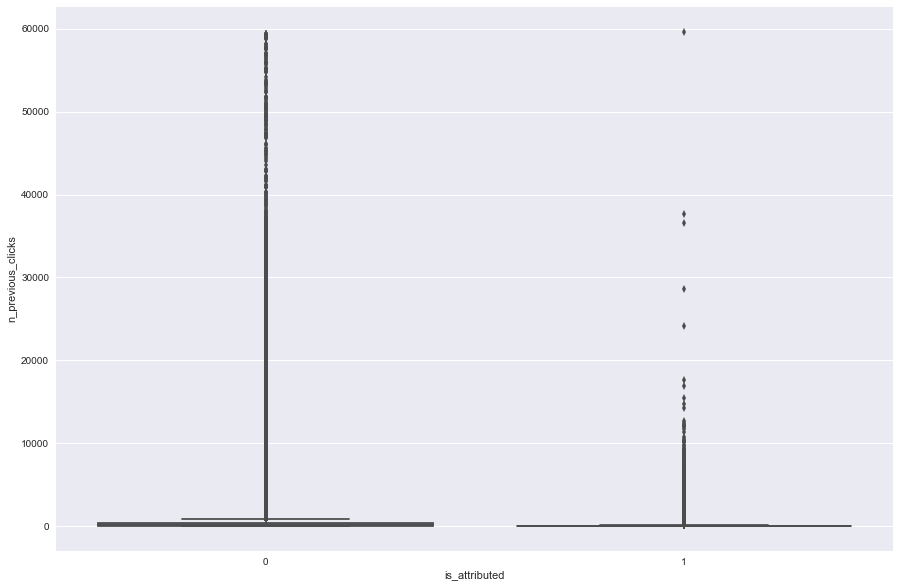

In [13]:
for col in list(data1.columns):
    if (col != 'click_time_wday' and col != 'click_time_hour' and col != 'is_attributed'):
        plt.figure(figsize=(15, 10))
        sns.boxplot(x='is_attributed', y=col, data=data1)
        plt.show()

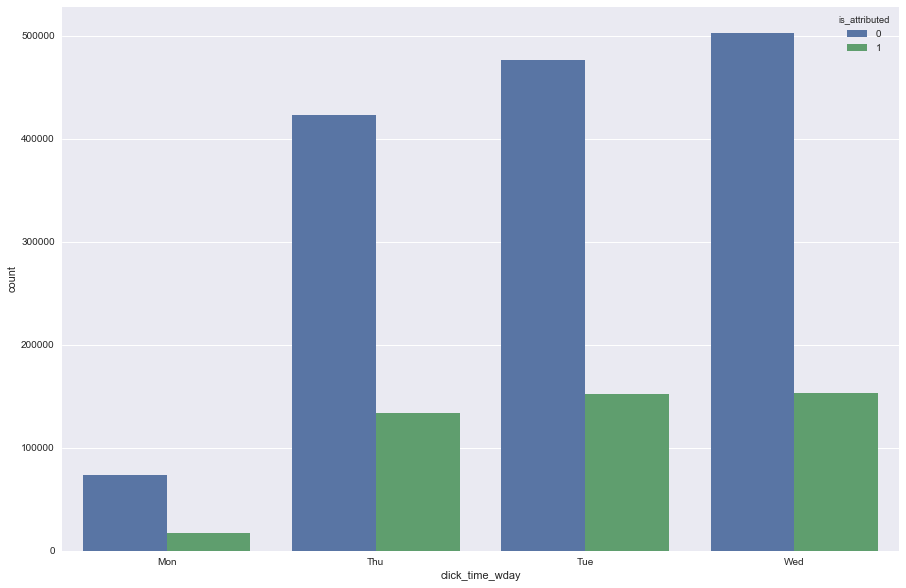

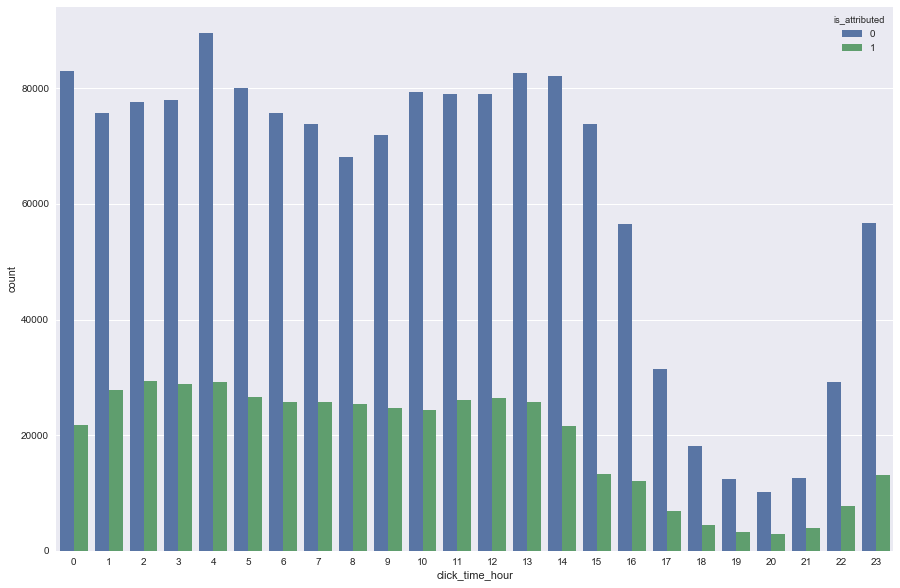

In [22]:
aux = data1
aux['is_attributed'] = data1['is_attributed'].astype('category')

for col in ['click_time_wday', 'click_time_hour']: 
    sns.plt.figure(figsize=(15, 10))
    sns.countplot(x=col, hue='is_attributed', data=aux)
    sns.plt.show()

In [23]:
data1.corr()

,device_custom_score,os_custom_score,app_custom_score,channel_custom_score,n_previous_clicks
device_custom_score,1.000000,0.692407,0.358512,0.459964,-0.070649
os_custom_score,0.692407,1.000000,0.398055,0.556434,-0.074494
app_custom_score,0.358512,0.398055,1.000000,0.569628,-0.068172
channel_custom_score,0.459964,0.556434,0.569628,1.000000,-0.091537
n_previous_clicks,-0.070649,-0.074494,-0.068172,-0.091537,1.000000


In [75]:
def corrs(df, columns_list, plot_size=(50, 50), font_scale = 1.5):
    if columns_list == 0:
        corrs = df.corr().round(2)        
    else:
        corrs = df[columns_list].corr().round(2)
        
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask, k = 0)] = True        

    sns.set(rc={'figure.figsize': plot_size})

    sns.set(font_scale=font_scale)

    sns.heatmap(corrs, xticklabels=corrs.columns.values, yticklabels=corrs.columns.values, 
                annot=True, mask=mask)
    
    plt.show()

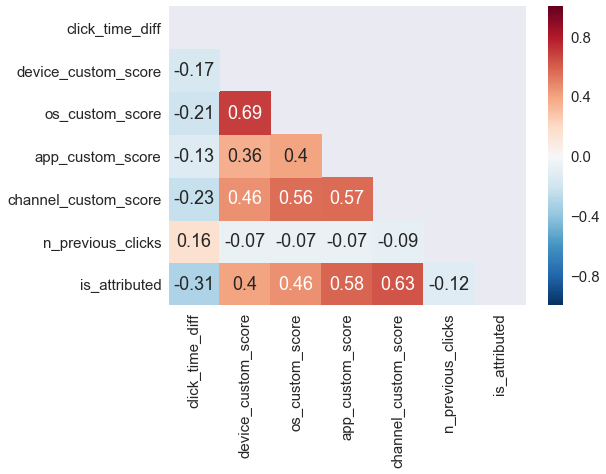

In [76]:
corrs(data1, list(data1.columns))

In [97]:
data1.columns

Index(['click_time_diff', 'device_custom_score', 'os_custom_score',
       'app_custom_score', 'channel_custom_score', 'n_previous_clicks',
       'click_time_hour', 'click_time_wday', 'is_attributed'],
      dtype='object')

In [4]:
data1_x = data1.drop(labels='is_attributed', axis=1)
data1_y = data1['is_attributed']

Pasamos las variables categóricas a 1s y 0s

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [183]:
# def weekday_number(wday_name):
#     if 'Mon' == wday_name:
#         return 1
#     elif 'Tue' == wday_name:
#         return 2
#     elif 'Wed' == wday_name:
#         return 3
#     elif 'Thu' == wday_name:
#         return 4
#     elif 'Fri' == wday_name:
#         return 5
#     elif 'Sat' == wday_name:
#         return 6
#     elif 'Sun' == wday_name:
#         return 7

In [6]:
aux = data1_x[['click_time_hour']]
# aux['click_time_wday'] = aux['click_time_wday'].astype('category').apply(lambda row: weekday_number(row))

one_hot_encoding = OneHotEncoder().fit(aux).transform(aux)

Antes de particionar los datos, los escalamos para que estén entre 0 y 1

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
aux = data1_x[['device_custom_score', 'os_custom_score', 'app_custom_score', 'channel_custom_score']]

data1_x = MinMaxScaler().fit(aux).transform(aux)

In [9]:
data1_x = np.hstack((data1_x, one_hot_encoding.toarray()))

Particionamos los datos

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train1_x, test1_x, train1_y, test1_y = train_test_split(data1_x, data1_y, train_size=0.8, random_state=16121993, stratify = data1_y.get_values())

/home/jose/anaconda3/envs/intro/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
dev1_x, test1_x, dev1_y, test1_y = train_test_split(test1_x, test1_y, train_size=0.5, random_state=16121993, stratify = test1_y)

/home/jose/anaconda3/envs/intro/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
train1_x, train_dev1_x, train1_y, train_dev1_y = train_test_split(train1_x, train1_y, train_size=0.9, random_state=16121993, stratify = train1_y)

/home/jose/anaconda3/envs/intro/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Vemos cómo es el balance de 1s y 0s

In [14]:
aux = pd.DataFrame(train1_y)

print( aux[aux['is_attributed'] == 0].count() )
print( aux[aux['is_attributed'] == 1].count() )

is_attributed    1062863
dtype: int64
is_attributed    328929
dtype: int64


Hacemos rebalanceo simple

In [14]:
from imblearn.under_sampling import RandomUnderSampler 
# from imblearn.under_sampling import OneSidedSelection

In [15]:
sru  =  RandomUnderSampler(random_state=16121993, ratio='auto') 

train1_x, train1_y = sru.fit_sample(train1_x, train1_y)
# oss = OneSidedSelection(random_state=16121993, n_jobs=4) 

# train1_x, train1_y = oss.fit_sample(train1_x, train1_y)

In [17]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import StratifiedKFold

In [18]:
start_time = time.time()

k_fold_train1 = StratifiedKFold(n_splits=5, random_state=16121993, shuffle=True).split(train1_x, train1_y)

tuned_parameters = {'n_estimators': np.array([300
#                                               , 50, 100, 200
                                             ]),
                    'criterion': ['entropy'
                                    #'gini', 'entropy'
                                 ],
                    'max_features': np.array(['auto']),
                    'max_depth': np.array([8, 16, 32
#                                           4 , 8, 10, 15
                                          ]),
                    'min_samples_split': np.array([0.025, 0.05, 0.1
#                                                   0.025 , 0.05, 0.10
                                                  ]),
                    'min_samples_leaf': np.array([0.025, 0.05, 0.1
#                                                  0.02 , 0.05, 0.1
                                                 ]),
                    'min_impurity_decrease': np.array([0.001
#                                                        , 0.00001, 0.0001, 0.001, 0.01
                                                      ])
                   }

rf = RandomForestClassifier(random_state=16121993)

grid = GridSearchCV(rf, 
                    param_grid=tuned_parameters, 
                    cv=k_fold_train1, 
                    n_jobs=-1,
                    scoring='roc_auc',
                    verbose = 2) 

rf_fit = grid.fit(train1_x, train1_y)

round(time.time() - start_time, 2) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 76.8min finished


4658.15

In [50]:
rf_fit.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 0.02,
 'min_samples_split': 0.025000000000000001,
 'n_estimators': 300}

In [19]:
rf_final = RandomForestClassifier(
            random_state=16121993,
            criterion=rf_fit.best_params_['criterion'],
            max_depth=rf_fit.best_params_['max_depth'],
            max_features=rf_fit.best_params_['max_features'],
            min_impurity_decrease=rf_fit.best_params_['min_impurity_decrease'],
            min_samples_leaf=rf_fit.best_params_['min_samples_leaf'],
            min_samples_split=rf_fit.best_params_['min_samples_split'],
            n_estimators=rf_fit.best_params_['n_estimators']).fit(train1_x, train1_y)

In [3]:
import pickle

In [42]:
with open('./final_models/rf_final_300_estimators_8_deep_data_1_no_click_vars_recall_optimized.pickle', mode='wb') as f:
    pickle.dump(rf_final, f, protocol=4)

In [20]:
k_fold_train1 = StratifiedKFold(n_splits=5, random_state=16121993, shuffle=True).split(train1_x, train1_y)

rf_validation_results = cross_validate(
                          RandomForestClassifier(
                            random_state=16121993,
                            criterion=rf_fit.best_params_['criterion'],
                            max_depth=rf_fit.best_params_['max_depth'],
                            max_features=rf_fit.best_params_['max_features'],
                            min_impurity_decrease=rf_fit.best_params_['min_impurity_decrease'],
                            min_samples_leaf=rf_fit.best_params_['min_samples_leaf'],
                            min_samples_split=rf_fit.best_params_['min_samples_split'],
                            n_estimators=rf_fit.best_params_['n_estimators']), 
                            train1_x, 
                            train1_y, 
                            scoring=['roc_auc', 'accuracy', 'f1', 'precision', 'recall'], 
                            cv=k_fold_train1,
                            n_jobs=-1
                        )

In [21]:
'''
Auxiliar function to show the results of SkLearn Cross-Validation Grid-Search in a fancy way.
'''
def k_folds_evaluation(validation_results):
    print('ROC AUC values: ')
    print(validation_results['test_roc_auc'])
    print('Mean ROC AUC: ')
    print('%0.3f (+/- %0.3f)' % (np.mean(validation_results['test_roc_auc']), np.std(validation_results['test_roc_auc'])))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')    
    print('Accuracies: ')
    print(validation_results['test_accuracy'])
    print('Mean accuracy: ')
    print('%0.3f (+/- %0.3f)' % (np.mean(validation_results['test_accuracy']), np.std(validation_results['test_accuracy'])))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('F1 values: ')
    print(validation_results['test_f1'])
    print('Mean F1: ')
    print('%0.3f (+/- %0.3f)' % (np.mean(validation_results['test_f1']), np.std(validation_results['test_f1'])))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Precisions: ')
    print(validation_results['test_precision'])
    print('Mean precision: ')
    print('%0.3f (+/- %0.3f)' % (np.mean(validation_results['test_precision']), np.std(validation_results['test_precision'])))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Recalls: ')
    print(validation_results['test_recall'])
    print('Mean recall: ')
    print('%0.3f (+/- %0.3f)' % (np.mean(validation_results['test_recall']), np.std(validation_results['test_recall'])))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

In [22]:
k_folds_evaluation(rf_validation_results)

ROC AUC values: 
[ 0.94639805  0.94789183  0.94552405  0.94628021  0.94520131]
Mean ROC AUC: 
0.946 (+/- 0.001)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracies: 
[ 0.90508619  0.90390053  0.90359651  0.90399173  0.90462871]
Mean accuracy: 
0.904 (+/- 0.001)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
F1 values: 
[ 0.8970741   0.89566107  0.89527914  0.89578074  0.89660173]
Mean F1: 
0.896 (+/- 0.001)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Precisions: 
[ 0.97978179  0.97965557  0.97981423  0.97955612  0.97899984]
Mean precision: 
0.980 (+/- 0.000)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Recalls: 
[ 0.82724288  0.82493236  0.82417232  0.82520597  0.82699704]
Mean recall: 
0.826 (+/- 0.001)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
import scikitplot.plotters as skplt

In [11]:
feature_names = ['device_custom_score', 'os_custom_score', 'app_custom_score', 'channel_custom_score',
                 'click_time_hour.0', 
                 'click_time_hour.1', 
                 'click_time_hour.2',
                 'click_time_hour.3',
                 'click_time_hour.4',
                 'click_time_hour.5',
                 'click_time_hour.6',
                 'click_time_hour.7',
                 'click_time_hour.8',
                 'click_time_hour.9',
                 'click_time_hour.10',
                 'click_time_hour.11',
                 'click_time_hour.12',
                 'click_time_hour.13',
                 'click_time_hour.14',
                 'click_time_hour.15',
                 'click_time_hour.16',
                 'click_time_hour.17',
                 'click_time_hour.18',
                 'click_time_hour.19',
                 'click_time_hour.20',
                 'click_time_hour.21',
                 'click_time_hour.22',
                 'click_time_hour.23']

In [ ]:
skplt.plot_feature_importances(rf_final, feature_names=feature_names, max_num_features=10, figsize=(50, 10))
plt.show()

In [26]:
results_to_vals = np.vectorize(lambda x: '1' if x == 1 else '0')

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
'''
Performance report for categorical data 
given an array of real values and an array of predicted values.
'''
def predicted_report(y_test, y_pred):   
    y_test_str = results_to_vals(y_test)
    y_pref_str = results_to_vals(y_pred)
    
    print('%s\n' % pd.crosstab(y_test_str, y_pref_str, rownames=['Actual'], colnames=['Predicted'], margins=True))

    print(classification_report(y_test_str, y_pref_str))

Predicted       0       1     All
Actual                           
0          323273    5656  328929
1           57446  271483  328929
All        380719  277139  657858

             precision    recall  f1-score   support

          0       0.85      0.98      0.91    328929
          1       0.98      0.83      0.90    328929

avg / total       0.91      0.90      0.90    657858



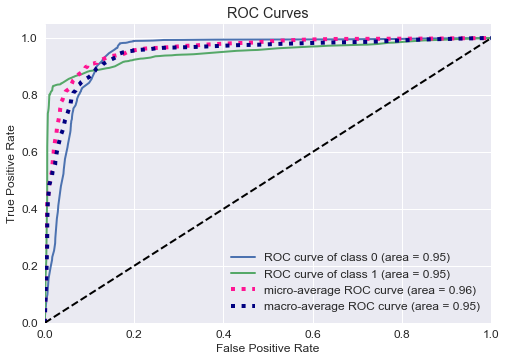

In [29]:
predicted_report(train1_y, rf_final.predict(train1_x))

skplt.plot_roc_curve(results_to_vals(train1_y), rf_final.predict_proba(train1_x))
plt.show()

Predicted       0      1     All
Actual                          
0          116094   2002  118096
1            6430  30118   36548
All        122524  32120  154644

             precision    recall  f1-score   support

          0       0.95      0.98      0.96    118096
          1       0.94      0.82      0.88     36548

avg / total       0.95      0.95      0.94    154644



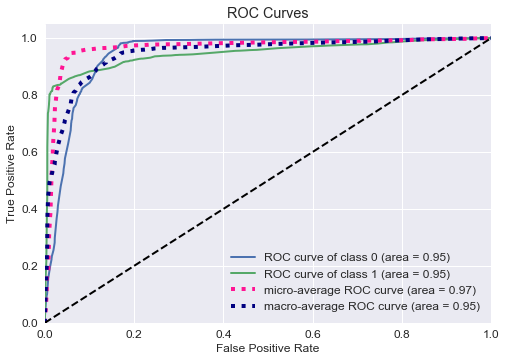

In [30]:
predicted_report(train_dev1_y, rf_final.predict(train_dev1_x))

skplt.plot_roc_curve(results_to_vals(train_dev1_y), rf_final.predict_proba(train_dev1_x))
plt.show()

Predicted       0      1     All
Actual                          
0          145041   2580  147621
1            7995  37689   45684
All        153036  40269  193305

             precision    recall  f1-score   support

          0       0.95      0.98      0.96    147621
          1       0.94      0.82      0.88     45684

avg / total       0.94      0.95      0.94    193305



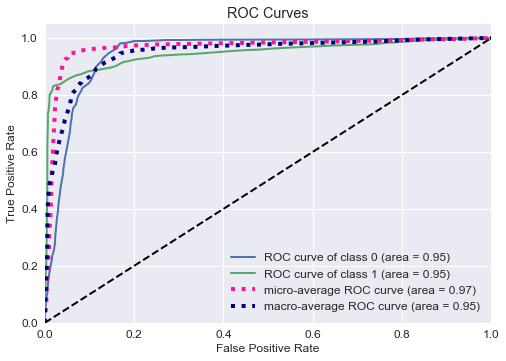

In [31]:
predicted_report(dev1_y, rf_final.predict(dev1_x))

skplt.plot_roc_curve(results_to_vals(dev1_y), rf_final.predict_proba(dev1_x))
plt.show()

Calculamos el best cutoff

In [76]:
from sklearn.metrics import roc_curve

In [92]:
fpr, tpr, thresholds = roc_curve(y_true = dev1_y, y_score = rf_final.predict_proba(dev1_x)[:, 1], pos_label = 1)

In [100]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

best_cutoff = list(roc_t['threshold'])[0]

best_cutoff

0.3444595897319091

Hay que preparar el submission con Spark (y ya de paso, el test y test_suplement). Test_suplement es un test cuyo test final del concurso será una parte de este.

In [65]:
gc.collect()

19558

In [32]:
submission_pd = pd.read_csv('./test_summit_data_wrangled.csv')

In [33]:
submission_pd.fillna(value = 0, inplace = True)

In [34]:
submission_pd.drop('click_id', inplace = True, axis = 1)

In [295]:
submission_pd.columns

Index(['os_custom_score', 'app_custom_score', 'channel_custom_score',
       'device_custom_score', 'click_time_wday', 'click_time_hour',
       'n_previous_clicks', 'click_time_diff'],
      dtype='object')

In [35]:
import submit_data_predict_utils as sdpu

In [45]:
import importlib
importlib.reload(sdpu)

<module 'submit_data_predict_utils' from '/home/jose/Desktop/dataton-kaggle-ads/submit_data_predict_utils.py'>

In [36]:
click_ids_aux = pd.read_csv('./test_summit_data_wrangled.csv', usecols = ['click_id'])

In [4]:
with open('./final_models/rf_final_300_estimators_8_deep_data_1.pickle', mode='rb') as f:
    rf_final = pickle.load(f)

In [104]:
rf_final.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 0.02,
 'min_samples_split': 0.050000000000000003,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 16121993,
 'verbose': 0,
 'warm_start': False}

In [37]:
predicted_submission = rf_final.predict( sdpu.model_data_preprocessing_for_submit_data(submission_pd) )

In [101]:
# con cutoff
# apply_cutoff = np.vectorize(lambda x: 1 if x > best_cutoff else 0)
# probs = rf_final.predict_proba( sdpu.model_data_preprocessing_for_submit_data(submission_pd) )[:, 1]
# predicted_submission = apply_cutoff( probs)

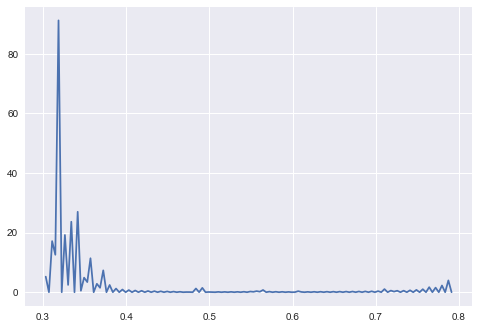

In [108]:
# sns.kdeplot(probs)
# plt.show()

In [38]:
pred_aux = pd.DataFrame( predicted_submission[:-24], columns = ['is_attributed'] )

In [39]:
pd.concat([click_ids_aux, pred_aux], axis = 1).to_csv('./submit_rf_300_estimators_8_deep.csv', index = False)